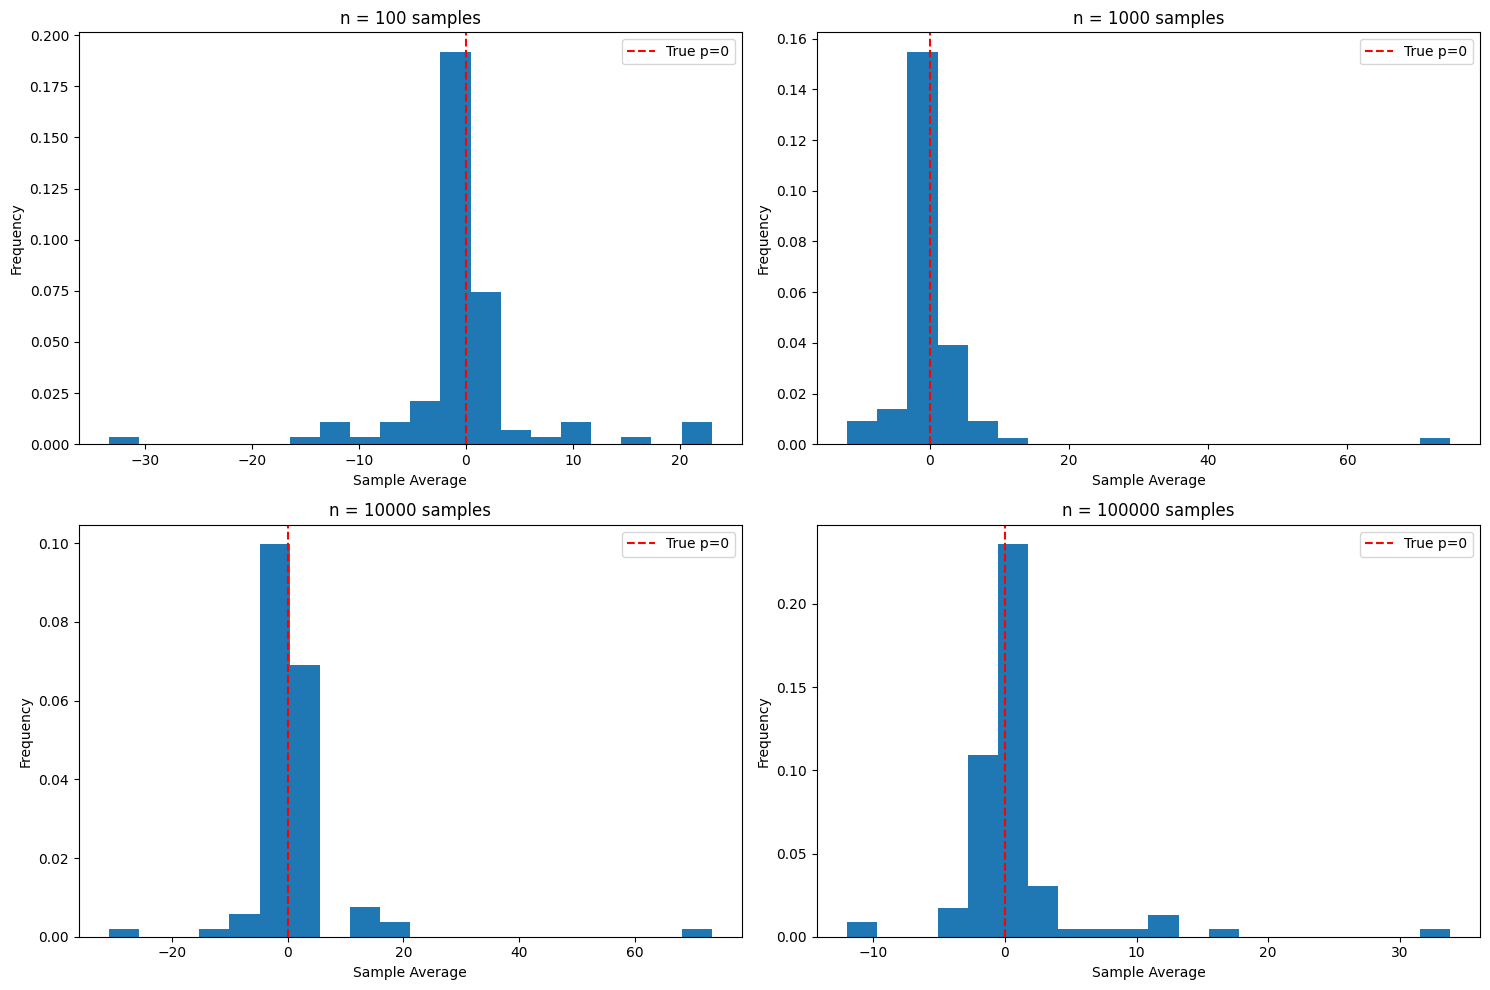


Summary Statistics:
--------------------------------------------------

For n = 100:
Mean of averages: -0.0022
Std of averages: 6.5689
Min average: -33.3454
Max average: 22.9637

For n = 1000:
Mean of averages: 0.6949
Std of averages: 8.0926
Min average: -11.8611
Max average: 74.7260

For n = 10000:
Mean of averages: 1.0177
Std of averages: 8.9600
Min average: -30.9752
Max average: 73.3429

For n = 100000:
Mean of averages: 0.7846
Std of averages: 4.9074
Min average: -11.9936
Max average: 33.8136


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_cauchy_samples(n, p=0, d=1):
    """Generate n samples from Cauchy distribution with location p and scale d"""
    # Using the fact that Cauchy is the ratio of normal distributions
    return p + d * np.random.standard_cauchy(n)

def run_experiment(n_samples, n_experiments=100):
    """Run experiments with n_samples samples, repeated n_experiments times"""
    averages = []
    for _ in range(n_experiments):
        samples = generate_cauchy_samples(n_samples)
        averages.append(np.mean(samples))
    return averages

# Different sample sizes to test
sample_sizes = [100, 1000, 10000, 100000]
n_experiments = 100
all_results = {}

# Run experiments for each sample size
for n in sample_sizes:
    all_results[n] = run_experiment(n)
    
# Create subplot for each sample size
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, n in enumerate(sample_sizes):
    averages = all_results[n]
    axes[idx].hist(averages, bins=20, density=True)
    axes[idx].set_title(f'n = {n} samples')
    axes[idx].axvline(x=0, color='r', linestyle='--', label='True p=0')
    axes[idx].set_xlabel('Sample Average')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("-" * 50)
for n in sample_sizes:
    averages = all_results[n]
    print(f"\nFor n = {n}:")
    print(f"Mean of averages: {np.mean(averages):.4f}")
    print(f"Std of averages: {np.std(averages):.4f}")
    print(f"Min average: {np.min(averages):.4f}")
    print(f"Max average: {np.max(averages):.4f}")